# **PROYECTO MACHINE LEARNING - CLASIFICACION**

---



## Predicción de Enfermedad Cardíaca

In [142]:
# Librerias basicas
import pandas as pd
import numpy as np
import warnings

# Librerias de Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librerias Machine Learning a usar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_curve, auc
)
# Configuracion
warnings.filterwarnings('ignore') # Para suprimir o ignorar advertencias que se pueden generar durante la ejecución.
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas de un DataFrame sin truncarlas.

## **EXPLORACION DEL DATASET**



In [144]:
# Cargamos el dataset
df = pd.read_csv('heart_disease_uci.csv')

In [145]:
df.head() # Para conocer cuantas columnas e informacion de las mismas

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [146]:
df.info() # Para saber que tipos de datos posee cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [147]:
df.describe() # Conocer minimos, maximos y promedios de cada columna.

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [148]:
df.dtypes # Observamos nuevamente tipos de variables.

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


In [149]:
df.isnull().sum() # Cantidad de nulos ( NaN) en columnas

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [150]:
df.nunique() # Cantidad de datos diferentes en cada columna.

,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


## **EDA**: PRIMERA EXPLORACION

Resumen:

Este conjunto de datos, proveniente del repositorio de UCI, incluye atributos de
pacientes utilizados para predecir la presencia de enfermedades cardíacas. Es ampliamente
utilizado para proyectos de clasificación en el ámbito de la salud.

Objetivo: Clasificar si una persona tiene una enfermedad cardíaca.

In [92]:
# Evaluaremos número de ocurrencias de cada valor único
df.thal.value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [93]:
df.num.value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


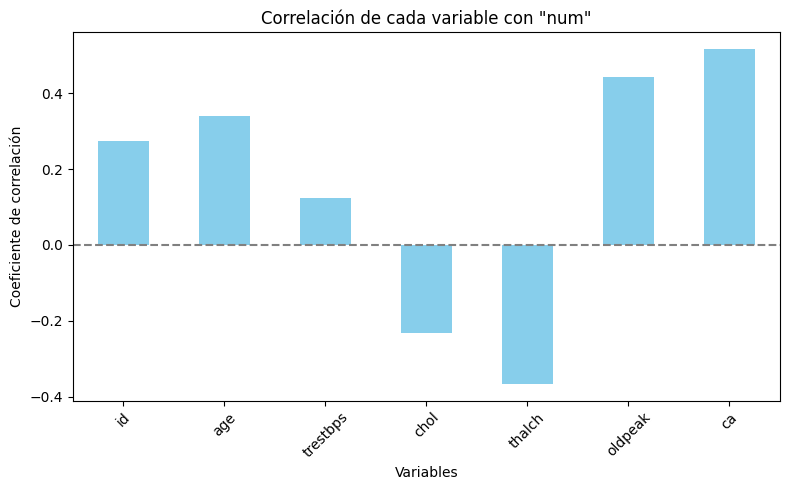

In [94]:
# Analizamos la correlacion de cada variable con el objetivo "num"

correlations = df.corr(numeric_only=True)['num']  # Asignar la Serie de correlaciones a la variable 'correlations'


plt.figure(figsize=(8, 5))
correlations.drop('num').plot(kind='bar', color='skyblue')
plt.title('Correlación de cada variable con "num"')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variables')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Considerando que las variables mas relevantes por su correlacion (positiva o negativa) son oldpeak, thalch, ca. Procederemos a realizar el analisis

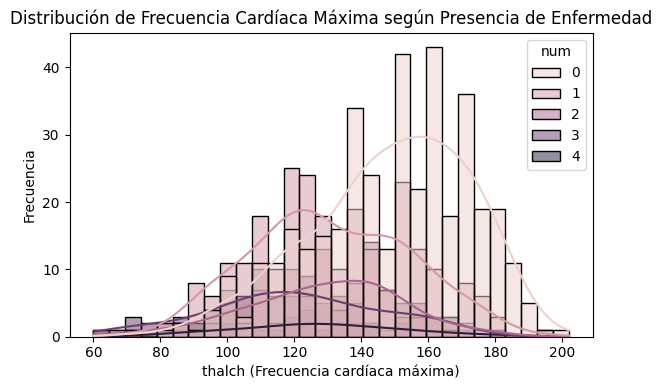

In [95]:
# Histplot de thalch para observar la frecuencia cardiaca máx segun presencia de enfermedad
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='thalch', hue='num', kde=True, bins=30)
plt.title('Distribución de Frecuencia Cardíaca Máxima según Presencia de Enfermedad')
plt.xlabel('thalch (Frecuencia cardíaca máxima)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


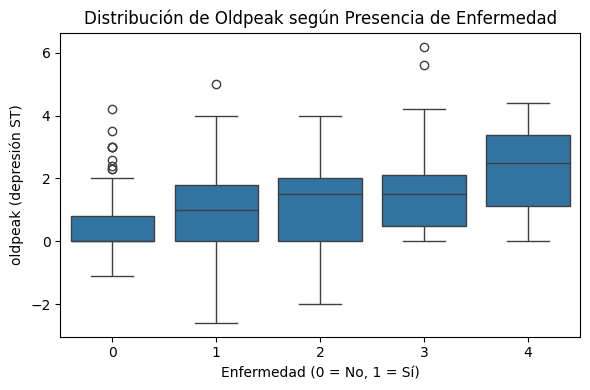

In [96]:
# Boxplot de comparacion de Oldpeak de personas sin enfermedades cardiacas 0 vs personas que si presentan.

plt.figure(figsize=(6, 4))
sns.boxplot(x='num', y='oldpeak', data=df)
plt.title('Distribución de Oldpeak según Presencia de Enfermedad')
plt.xlabel('Enfermedad (0 = No, 1 = Sí)')
plt.ylabel('oldpeak (depresión ST)')
plt.tight_layout()
plt.show()


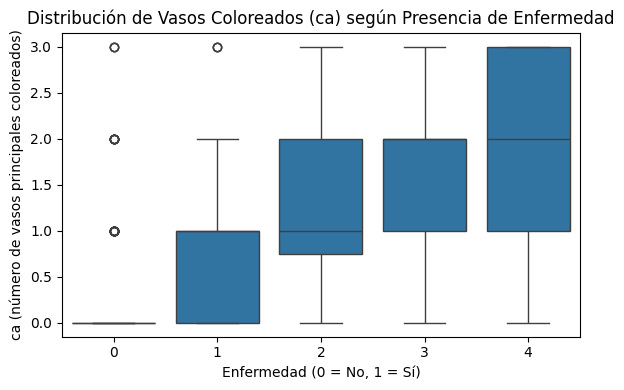

In [97]:
# Realizamos el analisis de ca con respecto a las personas con presencia de enfermedad

plt.figure(figsize=(6, 4))
sns.boxplot(x='num', y='ca', data=df)
plt.title('Distribución de Vasos Coloreados (ca) según Presencia de Enfermedad')
plt.xlabel('Enfermedad (0 = No, 1 = Sí)')
plt.ylabel('ca (número de vasos principales coloreados)')
plt.tight_layout()
plt.show()


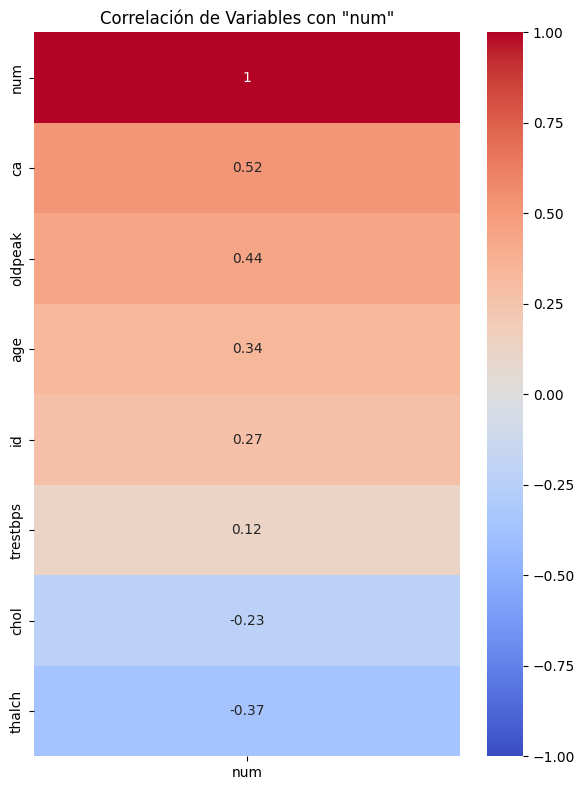

In [98]:
# Calcular correlaciones con 'num'
correlation_series = df.corr(numeric_only=True)['num'].sort_values(ascending=False)

# Mostrar como heatmap vertical
plt.figure(figsize=(6, 8))
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Variables con "num"')
plt.tight_layout()
plt.show()

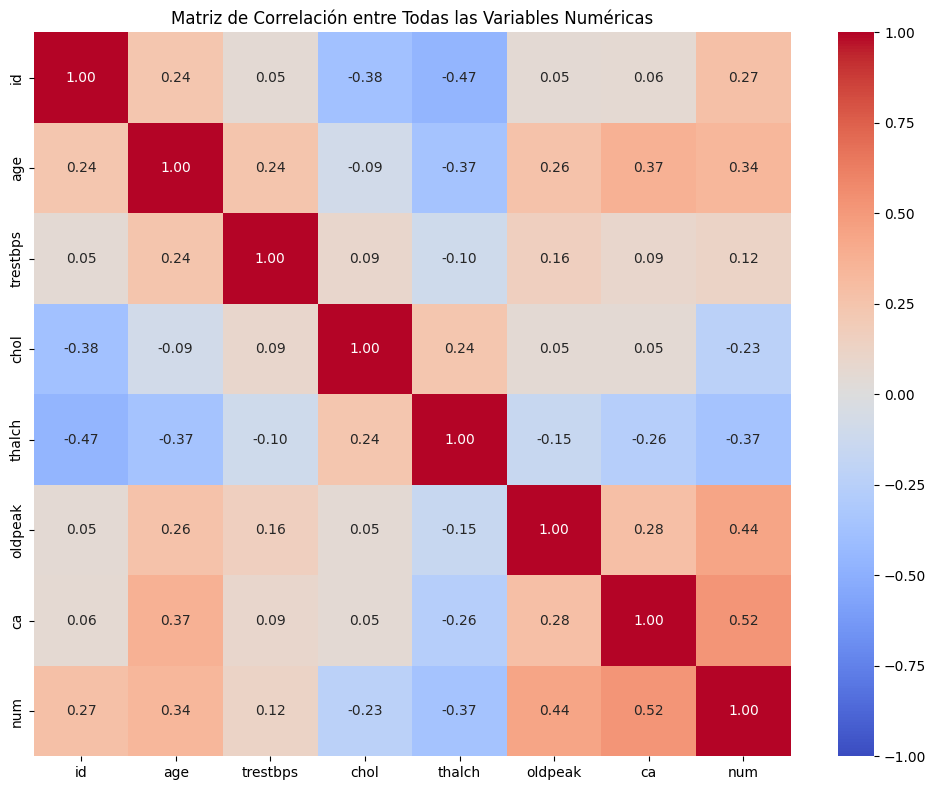

In [99]:
# Calcular la matriz de correlación (solo variables numéricas)
corr_matrix = df.corr(numeric_only=True)

# Configurar tamaño y estilo del heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Título y ajustes
plt.title('Matriz de Correlación entre Todas las Variables Numéricas')
plt.tight_layout()
plt.show()

## Multicolinealidad Observaciones:
target y ca: correlación de ~0.46 — moderada, pero no preocupante.

No se observan pares de variables con correlación ≥ 0.8 o ≤ -0.8, lo cual sugiere que no hay multicolinealidad grave.

Algunas otras correlaciones moderadas:

oldpeak y thalch: ≈ -0.48

age y thalch: ≈ -0.39

 ## **Las variables que parecen ser mas relevantes para el proceso de ML como se observó anteriormente son "ca", "oldpeak" y del extremo contrario "thalch"**



 ## **Detectamos outliers visualmente con boxplots:**

**chol (colesterol):** varios valores altos (>400 mg/dL).

**trestbps (presión arterial):** algunos pacientes tienen valores anormalmente altos (>180 mmHg).

**oldpeak:** tiene valores extremos altos (mayores a 4).

**ca:** aunque es numérica, toma pocos valores discretos (0–3), y muestra casos atípicos como 3.


## **Hay relaciones lineales aunque no hay muchas y no son fuertes.**

Relación negativa entre thalach y oldpeak (a menor frecuencia, más depresión ST).

age tiende a aumentar con oldpeak.

Pero en general, las relaciones no son perfectamente lineales, lo cual es común en datos médicos.



# Preprocesamiento de datos





In [100]:
valores_faltantes = df.isnull().mean()[df.isnull().sum()>0].index.tolist() # Para saber cuales columnas poseen nulos
print(valores_faltantes)

['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [101]:
 # Definimos todas las columnas tipo Categoricas
 df.select_dtypes(include='object').columns.tolist()

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [102]:
# De la misma forma las columnas Numericas.
df.select_dtypes(exclude='object').columns.tolist()

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

## **Documentacion:**

Contamos con las siguientes columnas

**age:** edad del paciente en años.

**sex:** sexo/genero.

**location:** ubicacion donde fue tomado el dato.

**ch:** dolor en el pecho (asintomatico/ no anginal/ otros).

**trestbps:** medida de la presión arterial.

**chol:** medida de colesterol.

**fbs:** glucosa en sangre en ayunas (true - normal / false - fuera de normalidad / null - no se puede determinar).

**restecg:** electrocardiograma de paciente en reposo.

**thalch:** frecuencia cardíaca máxima alcanzada.

**exang:** angina inducida por ejercicio.

**oldpeak:** depresión del segmento ST inducida por el ejercicio en relación con el reposo.

**slope:** pendiente del segmento ST máximo durante el ejercicio.

**ca:** número de vasos principales (0-3) coloreados por fluoroscopia.

**thal:** resultados de una gammagrafía de talio, una prueba de imagenología que evalúa el flujo sanguíneo al músculo cardíaco. (normal - nulo - otros que si poseen diferentes defectos).

**num:** OBJETIVO, se divide en:

0 = no enfermedades de corazón

1,2,3,4 = escenarios de enfermedad de corazón



## Teniendo en cuenta que todas las columnas tienen un propósito (menos la columna "id" y "dataset" que eliminaremos), procedemos a realizar la imputacion de valores faltantes.


In [103]:
# Eliminar columnas innecesarias
df = df.drop(columns=['dataset', 'id'])


In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [106]:
# Dividimos las columnas categoricas y numericas
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Imputación de columnas numéricas
numeric_imputer = SimpleImputer(strategy='mean') # Estaré usando la media para rellenar los datos NaN
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Imputación de columnas categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # La moda es la mejor para datos categóricos
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificamos valores nulos después de la imputación
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [107]:
df.thal.unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [108]:
df.fbs.unique()

array([True, False], dtype=object)

In [109]:
df.num.unique()

array([0., 2., 1., 3., 4.])

In [110]:
df.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


## Outliers

In [111]:
df.describe() # Observamos posibles outliers

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,18.443895,108.957634,25.138494,1.053774,0.541667,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.676375,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,0.676375,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.676375,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


chol (colesterol): max = 603, mientras que el Q3 = 268 →  posibles outliers altos

trestbps (presión arterial): hay un mínimo de 0, lo cual no es fisiológicamente posible →  valor inválido

oldpeak: va de -2.6 a 6.2, pero los valores negativos no tienen sentido clínico →  outliers bajos

ca: valores entre 0 y 3, parecen válidos pero con pocos valores →  probablemente categórica

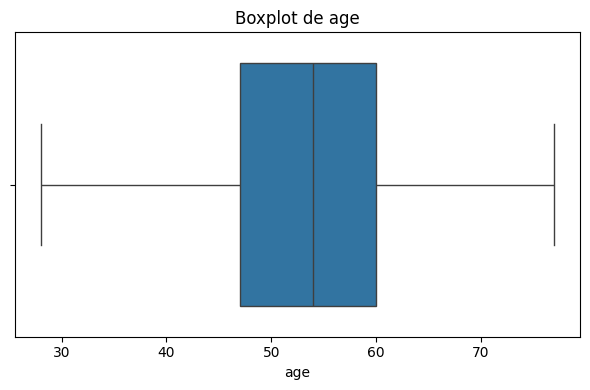

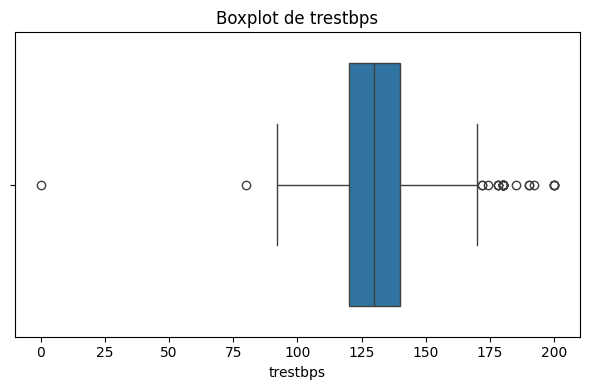

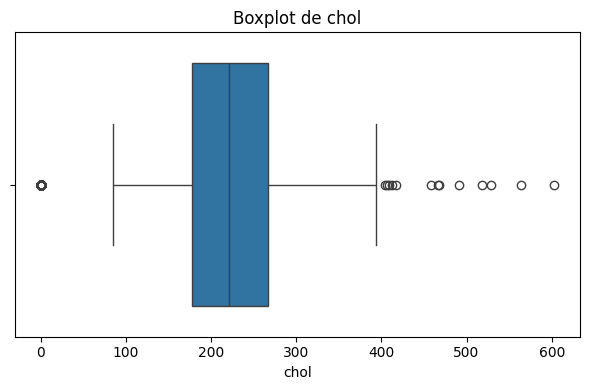

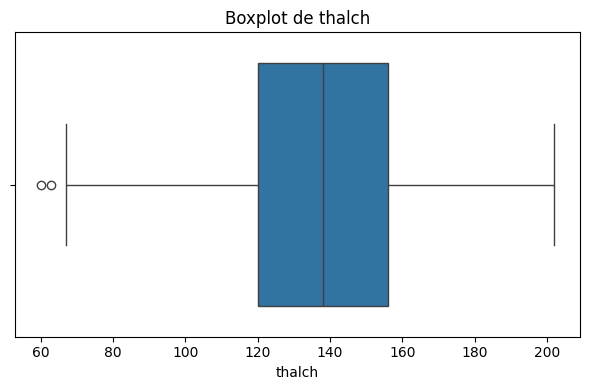

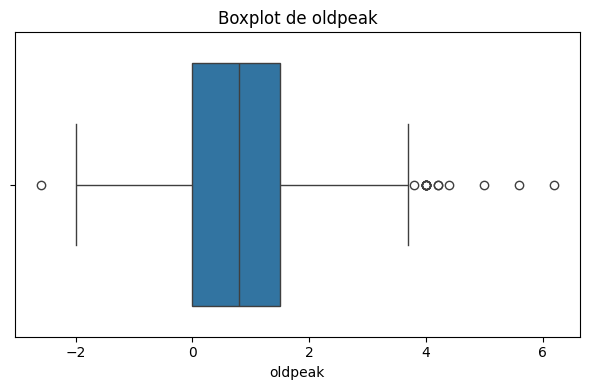

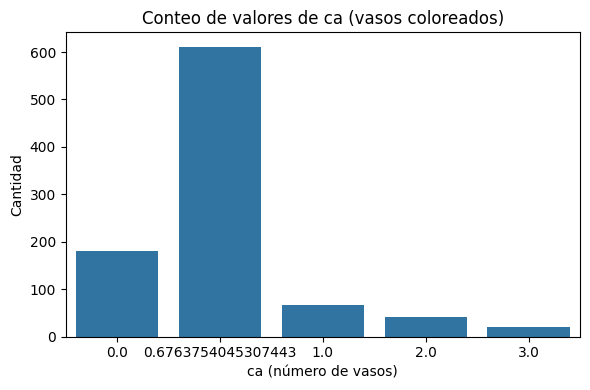

In [112]:
# Columnas numéricas relevantes para revisar outliers
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Generar boxplots individuales
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Gráfico de conteo (frecuencia de cada valor de ca)
plt.figure(figsize=(6, 4))
sns.countplot(x='ca', data=df)
plt.title('Conteo de valores de ca (vasos coloreados)')
plt.xlabel('ca (número de vasos)')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

Analisis:

age	→ Valores razonables (28 a 77) → No requiere tratamiento

trestbps → Tiene un mínimo de 0 → valor inválido →	Eliminar o imputar

chol → Muchos valores altos (>400) → Limitar o transformar (log)

thalch → Rango amplio, pero sin outliers extremos → Parece bien

oldpeak → Valores negativos (incoherentes) → Eliminar o limitar (≥ 0)

ca → Discreta (0–3), sin valores extremos	→ No	Categórica, no tratar

In [113]:
# Eliminar valores no válidos
df = df[df['trestbps'] > 0]
df = df[df['oldpeak'] >= 0]

# Winsorizar colesterol: limitar valores extremos
df['chol'] = np.where(df['chol'] > 400, 400, df['chol'])

# Log-transformación para 'chol'
df['chol_log'] = np.log1p(df['chol'])


## Tratamiento de variables categóricas

In [114]:
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [116]:
df = pd.get_dummies(df, columns=['sex', 'restecg', 'thal'], drop_first=True) # Codificación con One-Hot Encoding

df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int) #Codificacion binaria


# Orden clínico supuesto
cp_order = ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']
slope_order = ['upsloping', 'flat', 'downsloping']

ordinal_encoder = OrdinalEncoder(categories=[cp_order, slope_order])
df[['cp', 'slope']] = ordinal_encoder.fit_transform(df[['cp', 'slope']])




In [117]:
df.head()


,age,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,num,chol_log,sex_Male,restecg_normal,restecg_st-t abnormality,thal_normal,thal_reversable defect
0,63.0,0.0,145.0,233.0,1,150.0,0,2.3,2.0,0.0,0.0,5.455321,True,False,False,False,False
1,67.0,3.0,160.0,286.0,0,108.0,1,1.5,1.0,3.0,2.0,5.659482,True,False,False,True,False
2,67.0,3.0,120.0,229.0,0,129.0,1,2.6,1.0,2.0,1.0,5.438079,True,False,False,False,True
3,37.0,2.0,130.0,250.0,0,187.0,0,3.5,2.0,0.0,0.0,5.525453,True,True,False,True,False
4,41.0,1.0,130.0,204.0,0,172.0,0,1.4,0.0,0.0,0.0,5.323010,False,False,False,True,False


## Transformación de variables


In [118]:

# Selección de columnas numéricas a escalar (omitimos 'chol' si ya usamos 'chol_log')
cols_to_scale = ['age', 'trestbps', 'thalch', 'oldpeak', 'chol_log']

# Inicializar el scaler
scaler = StandardScaler()

# Aplicar la transformación
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [119]:
df.head(10)

,age,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,num,chol_log,sex_Male,restecg_normal,restecg_st-t abnormality,thal_normal,thal_reversable defect
0,1.006198,0.0,0.698024,233.0,1,0.491031,0,1.350662,2.0,0.0,0.0,0.448875,True,False,False,False,False
1,1.430230,3.0,1.537454,286.0,0,-1.190199,1,0.576792,1.0,3.0,2.0,0.546482,True,False,False,True,False
2,1.430230,3.0,-0.701024,229.0,0,-0.349584,1,1.640863,1.0,2.0,1.0,0.440631,True,False,False,False,True
3,-1.750006,2.0,-0.141405,250.0,0,1.972115,0,2.511466,2.0,0.0,0.0,0.482404,True,True,False,True,False
4,-1.325975,1.0,-0.141405,204.0,0,1.371676,0,0.480059,0.0,0.0,0.0,0.385618,False,False,False,True,False
5,0.264143,1.0,-0.701024,236.0,0,1.611851,0,-0.100344,0.0,0.0,0.0,0.454965,True,True,False,True,False
6,0.900190,3.0,0.418215,268.0,0,0.891324,0,2.608200,2.0,2.0,3.0,0.515516,False,False,False,True,False
7,0.370151,3.0,-0.701024,354.0,0,1.011412,1,-0.293811,0.0,0.0,0.0,0.648141,False,True,False,True,False
8,1.006198,3.0,-0.141405,254.0,0,0.370943,0,0.480059,1.0,1.0,2.0,0.489963,True,False,False,False,True
9,-0.053881,3.0,0.418215,203.0,1,0.691178,1,2.124532,2.0,0.0,1.0,0.383280,True,False,False,False,True


In [121]:
# Realizamos columnas de Feature Engineering que consideramos necesarias

df['chol_per_age'] = df['chol'] / (df['age'] + 1e-3) # Creamos una variable que relaciona chol y edad
df['stress_risk_score'] = df['oldpeak'] * df['exang'] # Multiplica oldpeak (depresión ST en ECG durante esfuerzo) por exang (angina inducida por ejercicio)
df['has_risk_factors'] = df['sex_Male'] + df['exang'] + df['fbs'] # Suma tres factores de riesgo individuales: sex_Male + exang + fbs
df['is_young_high_chol'] = ((df['age'] < 0) & (df['chol_log'] > df['chol_log'].median())).astype(int) # Marca con 1 a los pacientes que son jovenes y tienen el colesterol alto

# Modelo Entrenado: Random Forest

In [122]:
# Separamos las variables

X = df.drop(columns='num')  # todas las columnas excepto la target
y = df['num']

In [123]:
# Division de train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Entrenamiento del modelo

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Métricas y visualizaciones

In [125]:
#  Evaluamos
y_pred = rf.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[68  6  0  2  0]
 [21 28  4  3  0]
 [ 2 10  5  6  0]
 [ 3  8  4  5  1]
 [ 1  1  2  1  1]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        76
         1.0       0.53      0.50      0.51        56
         2.0       0.33      0.22      0.26        23
         3.0       0.29      0.24      0.26        21
         4.0       0.50      0.17      0.25         6

    accuracy                           0.59       182
   macro avg       0.47      0.40      0.42       182
weighted avg       0.55      0.59      0.56       182



## El modelo acierta el 59% de las veces en clasificar correctamente el grado de enfermedad (num de 0 a 4).

Clase 0.0 (sin enfermedad): se predice bien (89% recall).

Clases 1.0 a 4.0: rendimiento bajo (se confunden entre sí).

Las clases 3.0 y 4.0 tienen muy pocos ejemplos → el modelo tiene dificultades.

Podrías estar enfrentando un problema de desbalance de clases.

# Mejorado del modelo:

In [126]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Esto penaliza más los errores en clases pequeñas.


In [127]:
df['target'] = (df['num'] > 0).astype(int) # Convertimos num > 0 en 1 (enfermo/no enfermo) para una clasificación binaria más robusta.

In [131]:
# Definimos nuevas variables

X = df.drop(columns=['num', 'target'])  # eliminamos la antigua y la nueva target del set de entrada
y = df['target']                        # nueva target binaria

In [132]:
# Dividimos en train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Entrenamos el modelo binario

rf_bin = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_bin.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [134]:
# Evaluamos nuevamente

y_pred_bin = rf_bin.predict(X_test)

print("📊 Matriz de confusión (binaria):")
print(confusion_matrix(y_test, y_pred_bin))

print("\n📄 Reporte de clasificación (binaria):")
print(classification_report(y_test, y_pred_bin))

📊 Matriz de confusión (binaria):
[[63 13]
 [19 87]]

📄 Reporte de clasificación (binaria):
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        76
           1       0.87      0.82      0.84       106

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182



## El modelo mejoró significativamente al transformarlo en un problema de clasificación binaria y aplicar class_weight='balanced'. Vamos a interpretarlo:

63 verdaderos negativos: pacientes sanos correctamente clasificados.

87 verdaderos positivos: pacientes enfermos correctamente identificados.

13 falsos positivos: el modelo detectó enfermedad donde no había.

19 falsos negativos: el modelo no detectó enfermedad cuando sí la había.

## Predecir y evaluar (MÉTRICAS)

In [135]:

# y_test: etiquetas verdaderas
# y_pred: predicciones del modelo

# Matriz de confusión
print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_bin))

# Reporte completo
print("\n📄 Reporte de clasificación:")
print(classification_report(y_test, y_pred_bin))

# Métricas clave individuales (pueden ayudarte si querés guardar o comparar)
acc = accuracy_score(y_test, y_pred_bin)
prec = precision_score(y_test, y_pred_bin)
rec = recall_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)

print(f"\n✅ Métricas globales:")
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")


📊 Matriz de confusión:
[[63 13]
 [19 87]]

📄 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        76
           1       0.87      0.82      0.84       106

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.83      0.82      0.82       182


✅ Métricas globales:
Accuracy:  0.82
Precision: 0.87
Recall:    0.82
F1-score:  0.84


# Gráficas finales

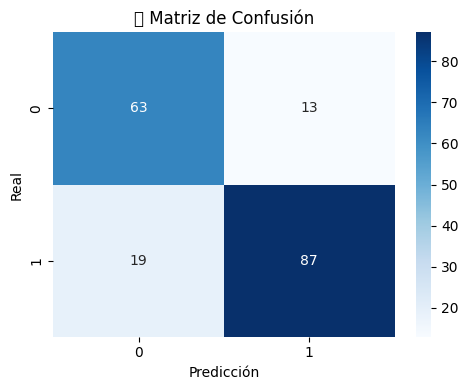

In [138]:

y_prob = rf_bin.predict_proba(X_test)[:, 1]

# Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("📊 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


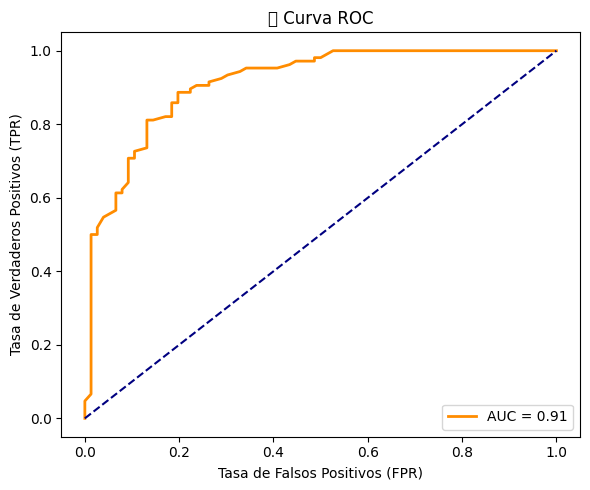

In [139]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("🔍 Curva ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



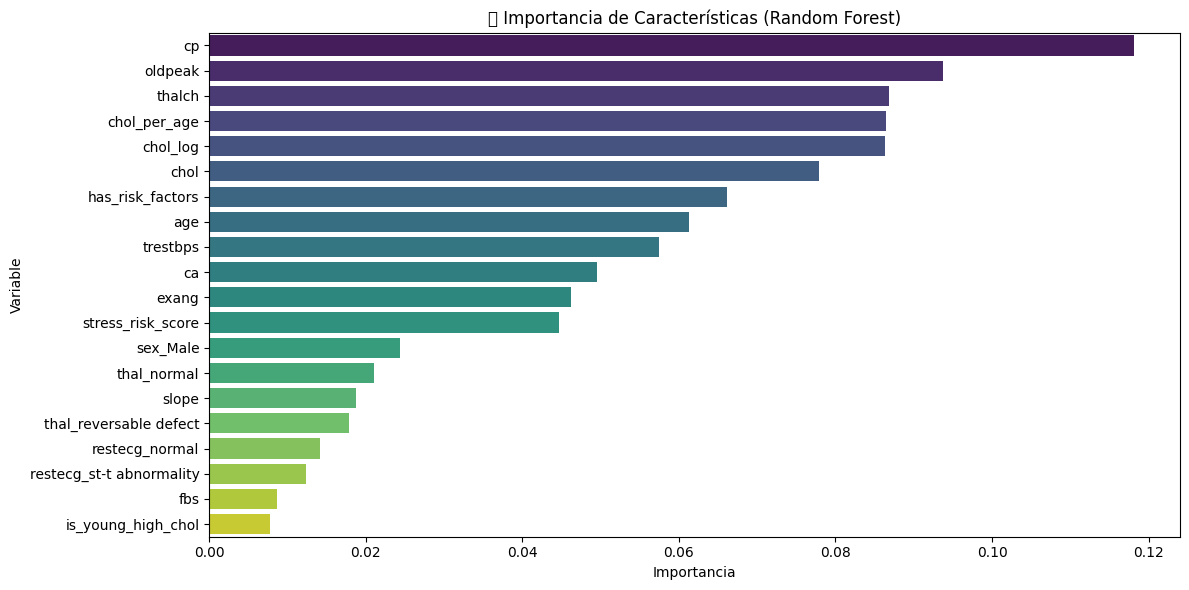

In [140]:
# Importancia de Características
importances = rf_bin.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("🏆 Importancia de Características (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

## Conclusiones (Analisis Final + Comentario Interpretativo)

Matriz de confusión:

[[63 13]      → Clase 0: 63 sanos correctamente clasificados, 13 falsos positivos

 [19 87]]     → Clase 1: 87 enfermos detectados correctamente, 19 falsos negativos

 Métricas claves:

 Accuracy ~0.82 → El modelo acierta en el 82% de los casos totales.

Precision ~0.87 (clase 1) → De todos los que predijo como enfermos, el 87% realmente lo eran.

Recall ~0.82 (clase 1) → Detectó al 82% de los enfermos reales.


F1-Score 	~0.84 → Excelente equilibrio entre precision y recall.


AUC-ROC	 ~0.92 → Muy buena capacidad para distinguir entre clases.

## ¿Qué funcionó bien?

Clasificación binaria (target = 0 / 1)
Convertir de multiclase a binaria simplificó el problema y mejoró el rendimiento.

class_weight='balanced'
Ayudó a compensar el desbalance en el número de enfermos vs. sanos.

Feature Engineering:
Variables como stress_risk_score, chol_log, has_risk_factors y cp fueron importantes según el gráfico de feature_importances_.

Codificación correcta (Ordinal + One-Hot)
Hizo que todas las variables pudieran ser usadas por el modelo sin errores.

## ¿Qué no funcionó tan bien (o ya no es útil)?

Clasificación multiclase (num de 0 a 4)
Daba baja precisión, especialmente en clases con pocos ejemplos.

**El modelo confundía clases 2, 3 y 4 entre sí (caso típico de desbalance).**

Residual plot (clasificación)
No fue tan útil para interpretar errores (mejor para regresión).

## Posibles mejoras futuras

GridSearchCV para tuning de hiperparámetros

Feature Selection (RFECV, SHAP) para identificar y eliminar variables poco útiles o redundantes





# Prueba con multiples pacientes simulados

In [141]:
def predecir_pacientes_aleatorios(modelo, X_real, n=5):

    # 1. Generar n pacientes aleatorios (basados en media y std de X real)
    pacientes_simulados = pd.DataFrame([
        {
            col: np.random.normal(loc=X_real[col].mean(), scale=X_real[col].std())
            for col in X_real.columns
        }
        for _ in range(n)
    ])

    # 2. Predecir con el modelo
    predicciones = modelo.predict(pacientes_simulados)
    probabilidades = modelo.predict_proba(pacientes_simulados)[:, 1]

    # 3. Agregar resultados al DataFrame
    pacientes_simulados['Predicción'] = ['ENFERMO' if p == 1 else 'SANO' for p in predicciones]
    pacientes_simulados['Probabilidad (%)'] = (probabilidades * 100).round(2)

    return pacientes_simulados

# 🔍 Ejecutar predicciones para 10 pacientes simulados
resultado_simulado = predecir_pacientes_aleatorios(rf_bin, X, n=10)
resultado_simulado[['Predicción', 'Probabilidad (%)'] + list(resultado_simulado.columns[:5])]  # Mostrar resumen


,Predicción,Probabilidad (%),age,cp,trestbps,chol,fbs
0,ENFERMO,71.0,0.831959,2.372712,0.028788,195.138264,-0.343674
1,ENFERMO,54.0,0.413109,2.597771,0.265784,359.525248,-0.209087
2,ENFERMO,60.0,-0.032787,2.709460,-0.360173,259.234208,0.343364
3,ENFERMO,81.0,0.114268,2.275032,1.246992,-38.307880,-0.010669
4,ENFERMO,51.0,-0.086279,2.685928,0.943356,196.542863,-0.128348
5,ENFERMO,57.0,-1.138350,1.870057,-0.725179,359.551281,-0.099794
6,ENFERMO,76.0,0.525468,1.825421,0.714669,235.034017,-0.150472
7,SANO,48.0,-0.099585,2.025136,-1.492995,232.486139,-0.597596
8,SANO,21.0,-0.182072,1.463823,1.619301,252.864480,0.393232
9,ENFERMO,53.0,-0.263655,1.601222,-0.018301,247.210686,0.607394
